In [5]:
import numpy
import matplotlib
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [6]:
#open file
doy=250
fname="ssi_"+str(doy)+'_2005.dat'
euv=zeros(190)
euvDAY=zeros(190*1440).reshape(190,1440) # flux in energy
euvPHD=zeros(190*1440).reshape(190,1440) # flux in phot

In [7]:
fil=open(fname,"r")
for i in range(3):
        print fil.readline()
j=0
while(1):
        try:
            minut=int(fil.readline())
           # print minut
        except:
            break
        euvL=(fil.readline().split())
        for i in range(190):
            euv[i]=float(euvL[i])
        euvDAY[:,j]=euv[:]
        j=j+1
        
fil.close()



    

ssi for250doy of the year 2005

190 1nm spectral intervals starting from 0 nm

1440 60 sec time intervals starting from 0



$E_o=h\nu = hc/\lambda$ - photon energy  
$I=E/{h\nu}$ - photon flux

In [8]:
lam=arange(1,191)
hnu=zeros(190)
h = 6.626e-34 #  Plank constant Joul*s
c=3.e8 # m/s 
hnu[:]=h*c/lam[:]*1.e9

In [9]:
for i in range(1440):
    euvPHD[:,i]=euvDAY[:,i]/hnu[:]*1.e-4*1.e-9 # norm on 10^9 for GSM

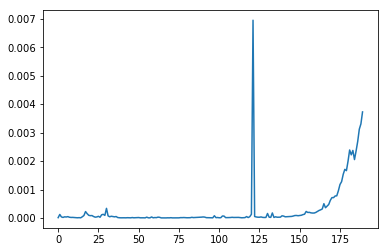

In [10]:
plot(euvDAY[:,60])

In [25]:
print euvDAY[120:125,60]

[  1.30620000e-04   6.94760000e-03   5.15940000e-05   3.57560000e-05
   2.74340000e-05]


In [12]:
# new spektr 
lowB=zeros(36)
highB=zeros(36)
#bon=zeros(36)
lowB= array([ 0,10,15,20,24,25,28,30,31,35,37,38,45,46,50,55,56,58,60,61,65,66,70,71,75,76,77,79,80,85,90,98,99,100,102,104])
highB=array([10,15,20,24,25,28,30,30,35,37,37,45,45,50,55,55,58,60,61,65,65,70,70,75,76,77,79,80,85,90,95,98,100,102,103,105])
#for i in range(36):
#    bon[i]=(lowB[i]+highB[i])*.5
bon=(lowB+highB)*.5
print len(bon)


36


In [13]:
N=size(lowB)
euvLOW=zeros(N)

In [14]:
for kh in range(36):
    ikb=int(lowB[kh])
    ikh=int(highB[kh])
    if(ikb==ikh):
        euvLOW[kh]=sum(euvDAY[ikb:ikh+1,0])
    else:
        euvLOW[kh]=sum(euvDAY[ikb:ikh,0])
    print ikb,ikh,euvDAY[ikb,0],euvDAY[ikh,0],euvLOW[kh]

0 10 1.3455e-05 1.4656e-05 0.000399942
10 15 1.4656e-05 4.3778e-05 5.27911e-05
15 20 4.3778e-05 8.1932e-05 0.000602869
20 24 8.1932e-05 3.6862e-05 0.00024776
24 25 3.6862e-05 5.9107e-05 3.6862e-05
25 28 5.9107e-05 0.00012904 0.000198209
28 30 0.00012904 0.00033949 0.000220295
30 30 0.00033949 0.00033949 0.00033949
31 35 7.3525e-05 4.0458e-05 0.000227466
35 37 4.0458e-05 1.538e-05 9.1323e-05
37 37 1.538e-05 1.538e-05 1.538e-05
38 45 8.4762e-06 5.8704e-06 5.17618e-05
45 45 5.8704e-06 5.8704e-06 5.8704e-06
46 50 1.4619e-05 1.5547e-05 4.69376e-05
50 55 1.5547e-05 2.9027e-05 3.99978e-05
55 55 2.9027e-05 2.9027e-05 2.9027e-05
56 58 5.489e-06 3.6329e-05 1.0276e-05
58 60 3.6329e-05 1.5081e-05 4.31924e-05
60 61 1.5081e-05 1.1878e-05 1.5081e-05
61 65 1.1878e-05 2.9968e-06 6.77472e-05
65 65 2.9968e-06 2.9968e-06 2.9968e-06
66 70 3.5934e-06 9.9367e-06 1.70514e-05
70 70 9.9367e-06 9.9367e-06 9.9367e-06
71 75 3.6467e-06 4.8613e-06 1.27293e-05
75 76 4.8613e-06 1.2741e-05 4.8613e-06
76 77 1.2741e-05 1

In [15]:
#i=0
#ik=0
#for kh in range(36):
#    sum=0
#    while ((highB[kh]>i) and (lowB[kh]<=i)):
#        sum=sum+euvDAY[i,60]
#        print highB[kh],i,ik
#        if(highB[kh] != lowB[kh]):
#            i=i+1
#    
#    ik=ik+1


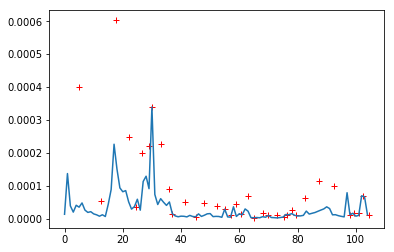

In [16]:
plot (bon,euvLOW,'r+')
plot(euvDAY[0:105,0]) 

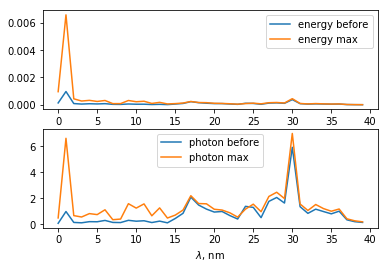

In [17]:
#plot in photon/cm2*s-1*10**9 
#plot(euvPHD[0:105,1160]) 
subplot(211)

plot(euvDAY[0:40,1050],label='energy before')
plot(euvDAY[0:40,1060],label='energy max')
legend()
subplot(212)
plot(euvPHD[0:40,1050],label='photon before')
plot(euvPHD[0:40,1060],label='photon max')
xlabel('$\lambda$, nm')
legend()

In [18]:
sumFLUX=zeros(1440)
sumPHOT=zeros(1440)
for i in range(1440):
    sumFLUX[i]= sum(euvDAY[0:105,i]) 
    sumPHOT[i]= sum(euvPHD[0:105,i])


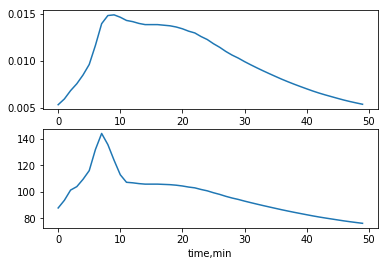

In [19]:
subplot(211)
plot(sumFLUX[1050:1100])
subplot(212)
plot(sumPHOT[1050:1100])
xlabel('time,min')

In [20]:
sum(euvLOW)

0.0032464144000000001